In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
"""def get_dataset(title, ts_name=None):
    ts_id = None
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    if ts_name is not None:
        ts_id = dataset.timeseries_set.all().filter(name=ts_name).first().id

    return dataset, training_dataset, ts_id"""
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [4]:
def lisa_pearson_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)
    return result

In [5]:
def lisa_dtw_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    result = %timeit -o lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function='euclidean')
    return result

In [6]:
def lisa_geo_detection_time_it(df, df_class, time_series_id, maximize_score='F1-Score'):
    result = %timeit -o lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)
    return result

In [7]:
def rpca_detection_time_it(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)
    return result

In [8]:
def histogram_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    result = %timeit -o histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)
    return result

In [9]:
def cluster_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    result = %timeit -o cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)
    return result

In [10]:
def svm_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    result = %timeit -o svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)
    return result

In [11]:
def isolation_forest_detection_time_it(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    result = %timeit -o isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)
    return result

In [5]:
# Temp1 Single - TS NUMBER
dataset_name = 'Idaweb Swiss Temperature TS14'
ts_names = ['REH', 'KLO', 'SHA', 'NABZUE', 'SMA', 'WYN', 'WAE', 'SAG', 'SRS', 'THU', 'VAD', 'RUE', 'HAI', 'VLS']
ts_name_lisa = 'REH'
dimensions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [13]:
# TIME TS NUMBER - Pearson
dataset, training_dataset = get_dataset(dataset_name)

lisa_pearson_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = lisa_pearson_detection_time_it(df, df_class, ts_id)
    lisa_pearson_results.append(np.round(np.average(r.all_runs), 2))

2.65 s ± 41.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.57 s ± 5.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 50 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 56.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.6 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.66 s ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.68 s ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.7 s ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.78 s ± 58.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 77.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
# TIME TS NUMBER - DTW
dataset, training_dataset = get_dataset(dataset_name)

lisa_dtw_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = lisa_dtw_detection_time_it(df, df_class, ts_id)
    lisa_dtw_results.append(np.round(np.average(r.all_runs), 2))

3.93 s ± 74.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.47 s ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.24 s ± 70.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.95 s ± 107 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.48 s ± 94.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.25 s ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.79 s ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.63 s ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.08 s ± 200 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.76 s ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.5 s ± 171 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11 s ± 253 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.6 s ± 200 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# TIME TS NUMBER - LISA VANILLA
dataset, training_dataset = get_dataset(dataset_name)
lisa_geo_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = lisa_geo_detection_time_it(df, df_class, ts_id)
    lisa_geo_results.append(np.round(np.average(r.all_runs), 2))

2.61 s ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.69 s ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.81 s ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.84 s ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.88 s ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.93 s ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.96 s ± 33.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.04 s ± 24.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.11 s ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.18 s ± 41.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.23 s ± 32.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# TIME TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
rpca_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = rpca_detection_time_it(df, df_class, df_train, df_train_class)
    rpca_results.append(np.round(np.average(r.all_runs), 2))

2.53 s ± 56.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.5 s ± 50.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 84.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.49 s ± 8.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.5 s ± 4.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.52 s ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 69.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.62 s ± 82.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 96.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.74 s ± 44.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.78 s ± 46.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# TIME TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

histogram_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = histogram_detection_time_it(df, df_class, df_train, df_train_class)
    histogram_results.append(np.round(np.average(r.all_runs), 2))

2.52 s ± 72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.58 s ± 49.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.62 s ± 54.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 55.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.62 s ± 76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.74 s ± 64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.73 s ± 46.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.72 s ± 72.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.72 s ± 92.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.77 s ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.87 s ± 68.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# TIME TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)
cluster_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = cluster_detection_time_it(df, df_class, df_train, df_train_class)
    cluster_results.append(np.round(np.average(r.all_runs), 2))

2.53 s ± 91.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.56 s ± 61.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.65 s ± 65.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.6 s ± 67.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 63.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 60.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.75 s ± 78.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.8 s ± 59.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 81.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.86 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.9 s ± 92.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.82 s ± 58.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
# TIME TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)
svm_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = svm_detection_time_it(df, df_class, df_train, df_train_class)
    svm_results.append(np.round(np.average(r.all_runs), 2))

2.48 s ± 56.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.56 s ± 63.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.6 s ± 39.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.6 s ± 49.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.63 s ± 82.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.6 s ± 54.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.61 s ± 33.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.59 s ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.64 s ± 51.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 69.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 61.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.7 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.71 s ± 41.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
# TIME TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

isolation_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    r = isolation_forest_detection_time_it(df, df_class, df_train, df_train_class)
    isolation_results.append(np.round(np.average(r.all_runs), 2))

2.83 s ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.87 s ± 38.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.89 s ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.92 s ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.89 s ± 53.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.92 s ± 33.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.95 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.91 s ± 60.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.01 s ± 28.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.05 s ± 72.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.06 s ± 25.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_geo_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [22]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': [2.65, 2.57, 2.64, 2.67, 2.65, 2.6, 2.66, 2.68, 2.7, 2.75, 2.73, 2.78, 2.84]}, {'title': 'LISA (DTW)', 'scores': [3.93, 4.47, 5.24, 5.95, 6.48, 7.25, 7.79, 8.63, 9.08, 9.76, 10.54, 10.97, 11.63]}, {'title': 'LISA (Vanilla)', 'scores': [2.61, 2.69, 2.73, 2.75, 2.81, 2.84, 2.88, 2.93, 2.96, 3.04, 3.11, 3.18, 3.23]}, {'title': 'RPCA', 'scores': [2.53, 2.5, 2.59, 2.49, 2.5, 2.52, 2.63, 2.62, 2.67, 2.75, 2.67, 2.74, 2.78]}, {'title': 'Histogram', 'scores': [2.52, 2.58, 2.62, 2.63, 2.59, 2.62, 2.65, 2.74, 2.73, 2.72, 2.72, 2.77, 2.87]}, {'title': 'Cluster', 'scores': [2.53, 2.56, 2.65, 2.59, 2.6, 2.67, 2.71, 2.75, 2.8, 2.71, 2.86, 2.9, 2.82]}, {'title': 'SVM', 'scores': [2.48, 2.56, 2.6, 2.6, 2.63, 2.6, 2.61, 2.59, 2.64, 2.71, 2.71, 2.7, 2.71]}, {'title': 'Isolation Forest', 'scores': [2.83, 2.87, 2.89, 2.92, 2.89, 2.92, 2.95, 2.98, 2.91, 2.98, 3.01, 3.05, 3.06]}]


In [2]:
import numpy as np
scores = [{'title': 'LISA (Pearson)', 'scores': [2.65, 2.57, 2.64, 2.67, 2.65, 2.6, 2.66, 2.68, 2.7, 2.75, 2.73, 2.78, 2.84]}, {'title': 'LISA (DTW)', 'scores': [3.93, 4.47, 5.24, 5.95, 6.48, 7.25, 7.79, 8.63, 9.08, 9.76, 10.54, 10.97, 11.63]}, {'title': 'LISA (Vanilla)', 'scores': [2.61, 2.69, 2.73, 2.75, 2.81, 2.84, 2.88, 2.93, 2.96, 3.04, 3.11, 3.18, 3.23]}, {'title': 'RPCA', 'scores': [2.53, 2.5, 2.59, 2.49, 2.5, 2.52, 2.63, 2.62, 2.67, 2.75, 2.67, 2.74, 2.78]}, {'title': 'Histogram', 'scores': [2.52, 2.58, 2.62, 2.63, 2.59, 2.62, 2.65, 2.74, 2.73, 2.72, 2.72, 2.77, 2.87]}, {'title': 'Cluster', 'scores': [2.53, 2.56, 2.65, 2.59, 2.6, 2.67, 2.71, 2.75, 2.8, 2.71, 2.86, 2.9, 2.82]}, {'title': 'SVM', 'scores': [2.48, 2.56, 2.6, 2.6, 2.63, 2.6, 2.61, 2.59, 2.64, 2.71, 2.71, 2.7, 2.71]}, {'title': 'Isolation Forest', 'scores': [2.83, 2.87, 2.89, 2.92, 2.89, 2.92, 2.95, 2.98, 2.91, 2.98, 3.01, 3.05, 3.06]}]


In [3]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Number of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

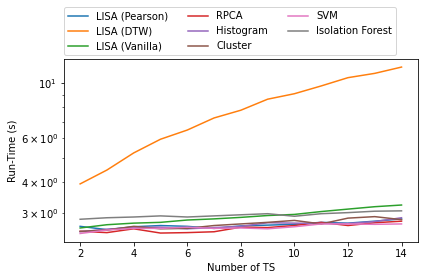

In [6]:
generate_timeit_line_chart(dimensions, scores)

In [2]:
dimension = np.array([2, 4, 6, 8, 10, 12, 14])

lisa_pearson_results = np.array([2.62, 2.59, 2.71, 2.79, 2.65, 2.66, 2.8])
lisa_dtw_results = np.array([3.88, 5.48, 6.62, 7.84, 9.16, 10.4, 12.1])
lisa_spatial_results = np.array([2.69, 2.72, 2.81, 2.88, 2.98, 3.08, 3.21])
rpca_results = np.array([2.64, 2.68, 2.66, 2.73, 2.63, 2.84, 2.86])
histogram_results = np.array([2.64, 2.66, 2.62, 2.68, 2.77, 2.86, 2.79])
cluster_results = np.array([2.64, 2.76, 2.65, 2.71, 2.73, 2.9, 2.9])
svm_results = np.array([2.55, 2.63, 2.66, 2.72, 2.73, 2.72, 2.83])
isolation_results = np.array([2.9, 2.88, 2.9, 2.9, 3, 3.03, 3.09])

scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [3]:
def generate_timeit_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results, label=title)
    ax.set_ylabel('Run-Time (s)')
    ax.set_xlabel('Number of TS')
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

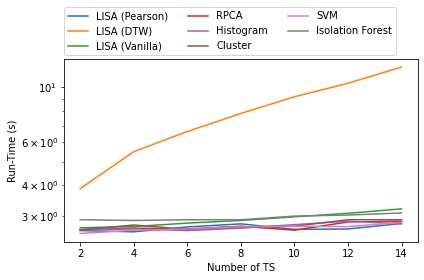

In [4]:
#PLOT
generate_timeit_line_chart(dimension, scores)
